In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_table('/home/dmitrii/vscode_projects/PMLDL/Assignment1/data/raw/filtered.tsv')

In [3]:
data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


# Main observations
I think first 3 columns are obvious and not extremely useful. Hovewer, length_diff is strange column because it's hard to interpret the meaning of this column. The main observation of this part is that reference sentence can be less toxic than translation sentence. It means that we have at least 2 options:
 * We can just remove all such cases (Where reference sentence is more toxic than translated)
 * We can rearrange translated sentence and reference sentence (I think it can give me profit in the future)  

In [4]:
conditions = [data.ref_tox < data.trn_tox ]
values = ['true']
data['swap'] = np.select(conditions, values)

In [5]:
# As we can see 1/3 of the dataset should be swapped
len(data[(data['swap'] == 'true')]) / len(data)

0.4476381025897535

In [6]:
is_swap = data['swap'] == 'true'

data.loc[is_swap, ['reference', 'translation', 'ref_tox', 'trn_tox']] = (
    data.loc[is_swap, ['translation', 'reference', 'trn_tox', 'ref_tox']].values)

In [13]:
data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox,swap
0,0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195,true
1,1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473,true
2,2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313,true
3,3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362,true
4,4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402,true


As we can see, now we perform task of detoxification, not toxification

Let's remove some data with inappropriate numbers. I mean not really toxic data for reference and not really non-toxic data for translation :)

Obviouslu, we should find tresholds for toxic and non-toxic sentences.

In [23]:
print(len(data[data["ref_tox"] >= 0.9]))
print(len(data[data["trn_tox"] <= 0.1]))

474680
517820


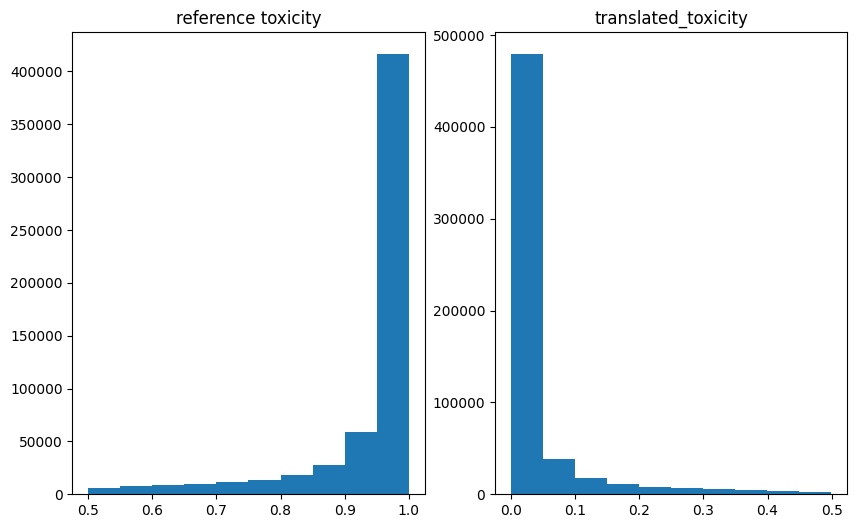

In [24]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1,2, figsize=(10,6)) 
axis[0].hist(data.ref_tox)
axis[0].set_title("reference toxicity")
axis[1].hist(data.trn_tox)
axis[1].set_title("translated_toxicity")
plt.show()

As we can see, we will not delete too much data from our dataset

In [29]:
index_drop = data[(data['ref_tox'] < 0.9) | (data['trn_tox'] > 0.1) ].index
data.drop(index_drop , inplace=True)
data.drop(columns=["swap", "Unnamed: 0"], axis=1, inplace=True)

In [30]:
data.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
